# Switching between Views

We often want to switch between different views like showing the sprint progress and the github star statistics. This notebook shows how to switch between different views using the `pixel_kpi` package and its `RotatingView` function.

In [1]:
from pixel_kpi.displays.pixoo_display import PixooDisplay
from pixel_kpi.displays.matplotlib_display import MatplotlibDisplay
from pixel_kpi.views.notion_sprint_view import NotionSprintView
from pixel_kpi.connectors.notion_connector import NotionConnector
from pixel_kpi.processors.notion.sprint_processor import SprintProcessor

from pixel_kpi.connectors.github_connector import GithubConnector
from pixel_kpi.processors.github.star_processor import StarProcessor
from pixel_kpi.views.github_stars_view import GithubStarsView

from pixel_kpi.views.rotating_view import RotatingView
import logging

logging.basicConfig(level=logging.INFO)

NOTION_API_KEY = "YOUR_NOTION_API_KEY"
NOTION_DATABASE_ID = "YOUR_NOTION_DATABASE_ID"

GITHUB_API_KEY = "YOUR_GITHUB_API_KEY"

#display = PixooDisplay(display_name="PixooDisplay", display_id=0, width=64, height=64, ip_adress="192.168.178.153", simulated=True)
display = MatplotlibDisplay(display_name="MatplotlibDisplay", display_id=0, width=64, height=64)

# Create Notion connector and processor
notion_connector = NotionConnector(api_key=NOTION_API_KEY, database_id=NOTION_DATABASE_ID)
notion_sprint_processor = SprintProcessor()

# Create Github connector and processor
github_connector = GithubConnector(api_key=GITHUB_API_KEY)
star_processor = StarProcessor()

# Create views
notion_sprint_view = NotionSprintView(display=display, connector=notion_connector, processor=notion_sprint_processor, refresh_rate=60*15, main_color=(80, 255, 255))
github_stars_view = GithubStarsView(display=display, connector=github_connector, processor=star_processor, refresh_rate=60*15, main_color=(80, 255, 255), repository="pi_optimal/pi_optimal")

# Add them to rotating view
rotating_view = RotatingView(display=display, views=[github_stars_view, notion_sprint_view], switch_interval=10, refresh_rate=60*15)

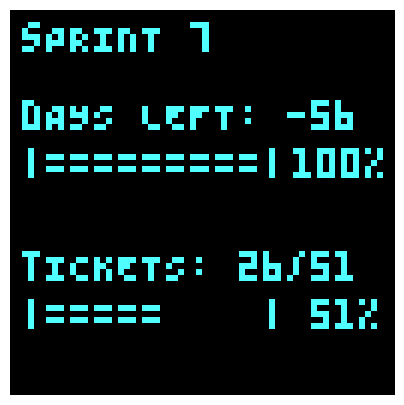

INFO:pixel_kpi.displays.base_display:Rendered image using Matplotlib.


KeyboardInterrupt: 

In [2]:
rotating_view.run()